# Science and Technology Analysis

# I. Downloading Dataset

In [9]:
import pandas as pd
df = pd.read_csv('ae5a7df3-44e2-4b55-9f1e-d1fa0e640448_Data.csv')
df.head()

,Time,Time Code,Country Name,Country Code,"Charges for the use of intellectual property, payments (BoP, current US$)",Human capital index (HCI) (scale 0-1),"School enrollment, secondary (gross), gender parity index (GPI)","Literacy rate, youth (ages 15-24), gender parity index (GPI)",Claims on other sectors of the domestic economy (% of GDP)
0,2020,YR2020,Afghanistan,AFG,6111813.81573379,0.400284141302109,..,..,..
1,2020,YR2020,Albania,ALB,38609323.6413546,0.634250938892365,1.02103996276855,..,39.8460574807341
2,2020,YR2020,Algeria,DZA,..,0.534556448459625,..,..,..
3,2020,YR2020,American Samoa,ASM,..,..,..,..,..
4,2020,YR2020,Andorra,AND,..,..,..,..,..


# II. Data Preparation

In [10]:
df.shape

(217, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Time                                                                       217 non-null    int64 
 1   Time Code                                                                  217 non-null    object
 2   Country Name                                                               217 non-null    object
 3   Country Code                                                               217 non-null    object
 4   Charges for the use of intellectual property, payments (BoP, current US$)  217 non-null    object
 5   Human capital index (HCI) (scale 0-1)                                      217 non-null    object
 6   School enrollment, secondary (gross), gender parity index (GPI)    

### Fixing Amount spent

In [15]:
df['Charges for the use of intellectual property, payments (BoP, current US$)'] = df['Charges for the use of intellectual property, payments (BoP, current US$)'].replace('..',0).replace('...',0)
df['Charges for the use of intellectual property, payments (BoP, current US$)'] = df['Charges for the use of intellectual property, payments (BoP, current US$)'].astype(float)

### Fixing HCI

In [16]:
df['Human capital index (HCI) (scale 0-1)'] = df['Human capital index (HCI) (scale 0-1)'].replace('..',0).replace('...',0)
df['Human capital index (HCI) (scale 0-1)'] = df['Human capital index (HCI) (scale 0-1)'].astype(float)

### Fixing Secondary Education

In [17]:
df['School enrollment, secondary (gross), gender parity index (GPI)'] = df['School enrollment, secondary (gross), gender parity index (GPI)'].replace('..',0).replace('...',0)
df['School enrollment, secondary (gross), gender parity index (GPI)'] = df['School enrollment, secondary (gross), gender parity index (GPI)'].astype(float)

### Gender Parity Index

In [18]:
df['Literacy rate, youth (ages 15-24), gender parity index (GPI)'] = df['Literacy rate, youth (ages 15-24), gender parity index (GPI)'].replace('..',0).replace('...',0)
df['Literacy rate, youth (ages 15-24), gender parity index (GPI)'] = df['Literacy rate, youth (ages 15-24), gender parity index (GPI)'].astype(float)

### Fixing Domestic economy

In [19]:
df['Claims on other sectors of the domestic economy (% of GDP)'] = df['Claims on other sectors of the domestic economy (% of GDP)'].replace('..',0).replace('...',0)
df['Claims on other sectors of the domestic economy (% of GDP)'] = df['Claims on other sectors of the domestic economy (% of GDP)'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Time                                                                       217 non-null    int64  
 1   Time Code                                                                  217 non-null    object 
 2   Country Name                                                               217 non-null    object 
 3   Country Code                                                               217 non-null    object 
 4   Charges for the use of intellectual property, payments (BoP, current US$)  217 non-null    float64
 5   Human capital index (HCI) (scale 0-1)                                      217 non-null    float64
 6   School enrollment, secondary (gross), gender parity index (

# III. Data Visualizations

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [51]:
arr = []
for x in range(1,16):
    x = float(df.loc[(df["Country Name"] == "India"), "Charges for the use of intellectual property, payments (BoP, current US$)"])
    arr.append(x)

In [60]:
import plotly.graph_objects as go
           
fig = go.Figure(data=[
    go.Bar(name='Other Countries', x=df['Country Name'].head(15), y=df['Charges for the use of intellectual property, payments (BoP, current US$)'].head(15)),
    go.Bar(name='India', x=df['Country Name'].head(15), y=arr)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [124]:
yo=[]
for x in df['Country Name'].head(15):
    yo.append((100 - 100*(float(df.loc[(df["Country Name"] == "India"), "Charges for the use of intellectual property, payments (BoP, current US$)"])/float(df.loc[(df["Country Name"] == x), "Charges for the use of intellectual property, payments (BoP, current US$)"]))))

In [130]:
fig = px.bar(df,x=df['Country Name'].head(15), y=yo,color=yo,color_continuous_scale = "darkmint",template = "plotly_dark")
fig.update_traces(texttemplate=y, textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

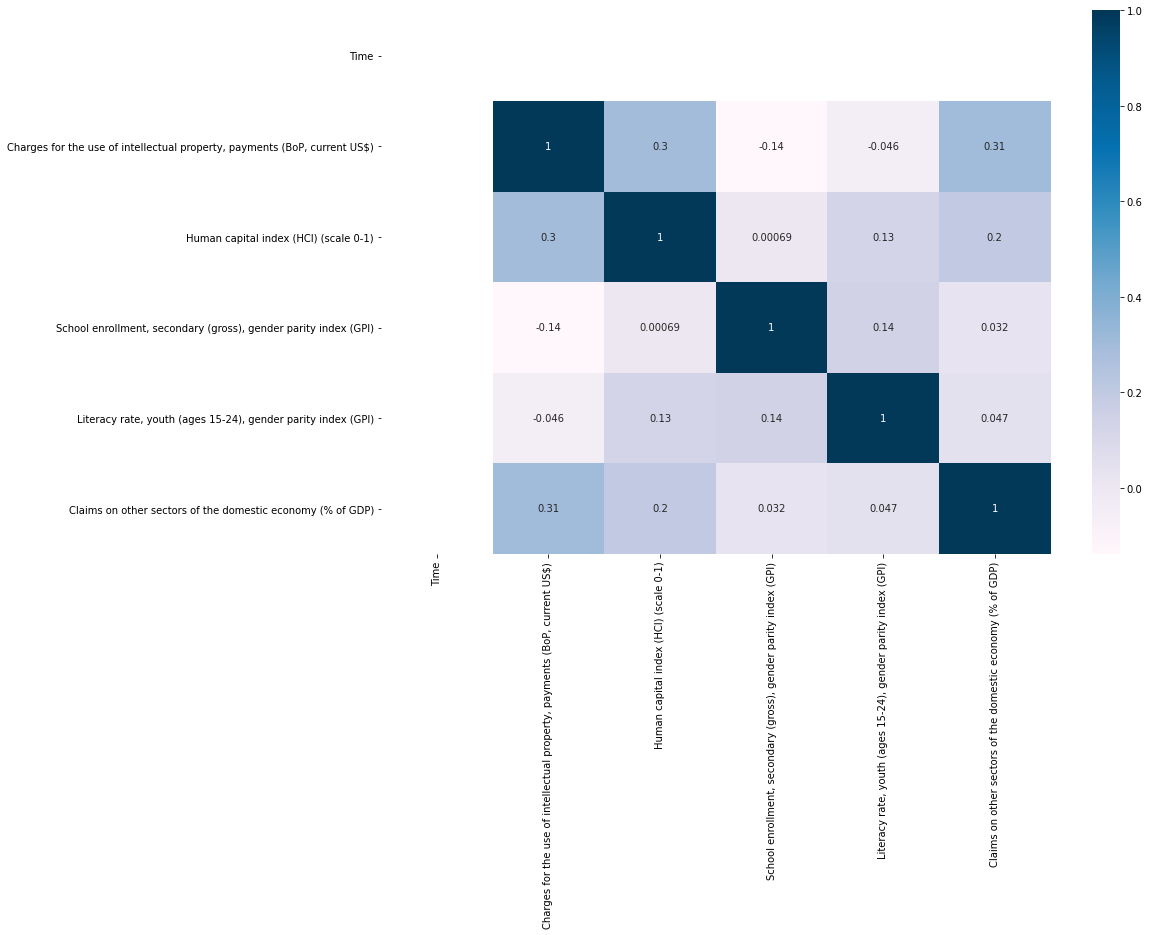

In [131]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap = 'PuBu',annot=True)
plt.show()

From the correlation matrix, <br>
correlation between **Amount spend VS HCL is 0.3** which is very less in number. I would say the thresold correlation value must be higher than 0.9 that I would say they both are highly correlated but since this is not the case here so **Amount spend and HCL** are Independent from each other.<br>
Similarly, <br>
for **Amount spend VS Secondary Education is -0.14** so these are Independent as well.<br>
for **Amount spend VS GPI is -0.046** so these are Independent as well.<br>
for **Amount spend VS Domestic Economy is -0.14** so these are Independent as well.<br>

